In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
%pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
import wandb
from IPython.display import Image, clear_output

In [ ]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [ ]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.6 MB/s eta 0:00:00


In [ ]:
#!unzip -q /content/Drone_New.zip -d ../

replace ../Drone_New1/images/train/a1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ../Drone_New1/images/train/a10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Training**

In [ ]:
!python train.py --img 640 --batch 2 --epochs 100 --data custom_data.yaml --weights yolov5s.pt --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patie

In [ ]:
!python val.py --weights runs/train/exp4/weights/best.pt --data custom_data.yaml --img 640

val: data=custom_data.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-161-gf11a8a62 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/Drone_New/labels/val.cache' images and labels... 90 found, 0 missing, 0 empty, 0 corrupt: 100% 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.09it/s]
                   all         90        154      0.889      0.904       0.95      0.665
            Army Drone         90         35      0.934      0.914      0.959       0.

In [ ]:
!python val.py --weights runs/train/exp4/weights/best.pt --data custom_data.yaml --img 640 --half

val: data=custom_data.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.2-161-gf11a8a62 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5/Drone_New/labels/val.cache' images and labels... 90 found, 0 missing, 0 empty, 0 corrupt: 100% 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.21it/s]
                   all         90        154      0.889      0.904       0.95      0.666
            Army Drone         90         35      0.933      0.914      0.959       0.6

In [ ]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Test_Images/at1.jpg

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/Test_Images/at1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/drive/My': No such file or directory
YOLOv5 🚀 2022-9-24 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Coordinates of bounding box  1 [0.41129031777381897, 0.6419752836227417, 0.5774193406105042, 0.6419752836227417]   tensor(0.87193)

Number of objects detected :  1
image 1/1 /content/drive/MyDrive/Test_Images/at1.jpg: 352x640 1 Army Drone, 400.6ms
Speed: 6.8ms pre-process, 400.6ms i

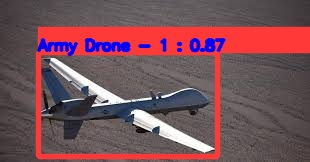

In [ ]:
img=cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp93/at1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
cv2.waitKey(10)
cv2.destroyAllWindows()

In [ ]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/4drones.jpg

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/4drones.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-161-gf11a8a62 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Coordinates of bounding box  1 [0.7425000071525574, 0.7462499737739563, 0.48399999737739563, 0.29750001430511475]   tensor(0.85159)
Coordinates of bounding box  2 [0.2709999978542328, 0.3372499942779541, 0.5230000019073486, 0.27250000834465027]   tensor(0.89849)
Coordinates of bounding box  3 [0.7425000071525574, 0.33799999952316284, 0.5080000162124634

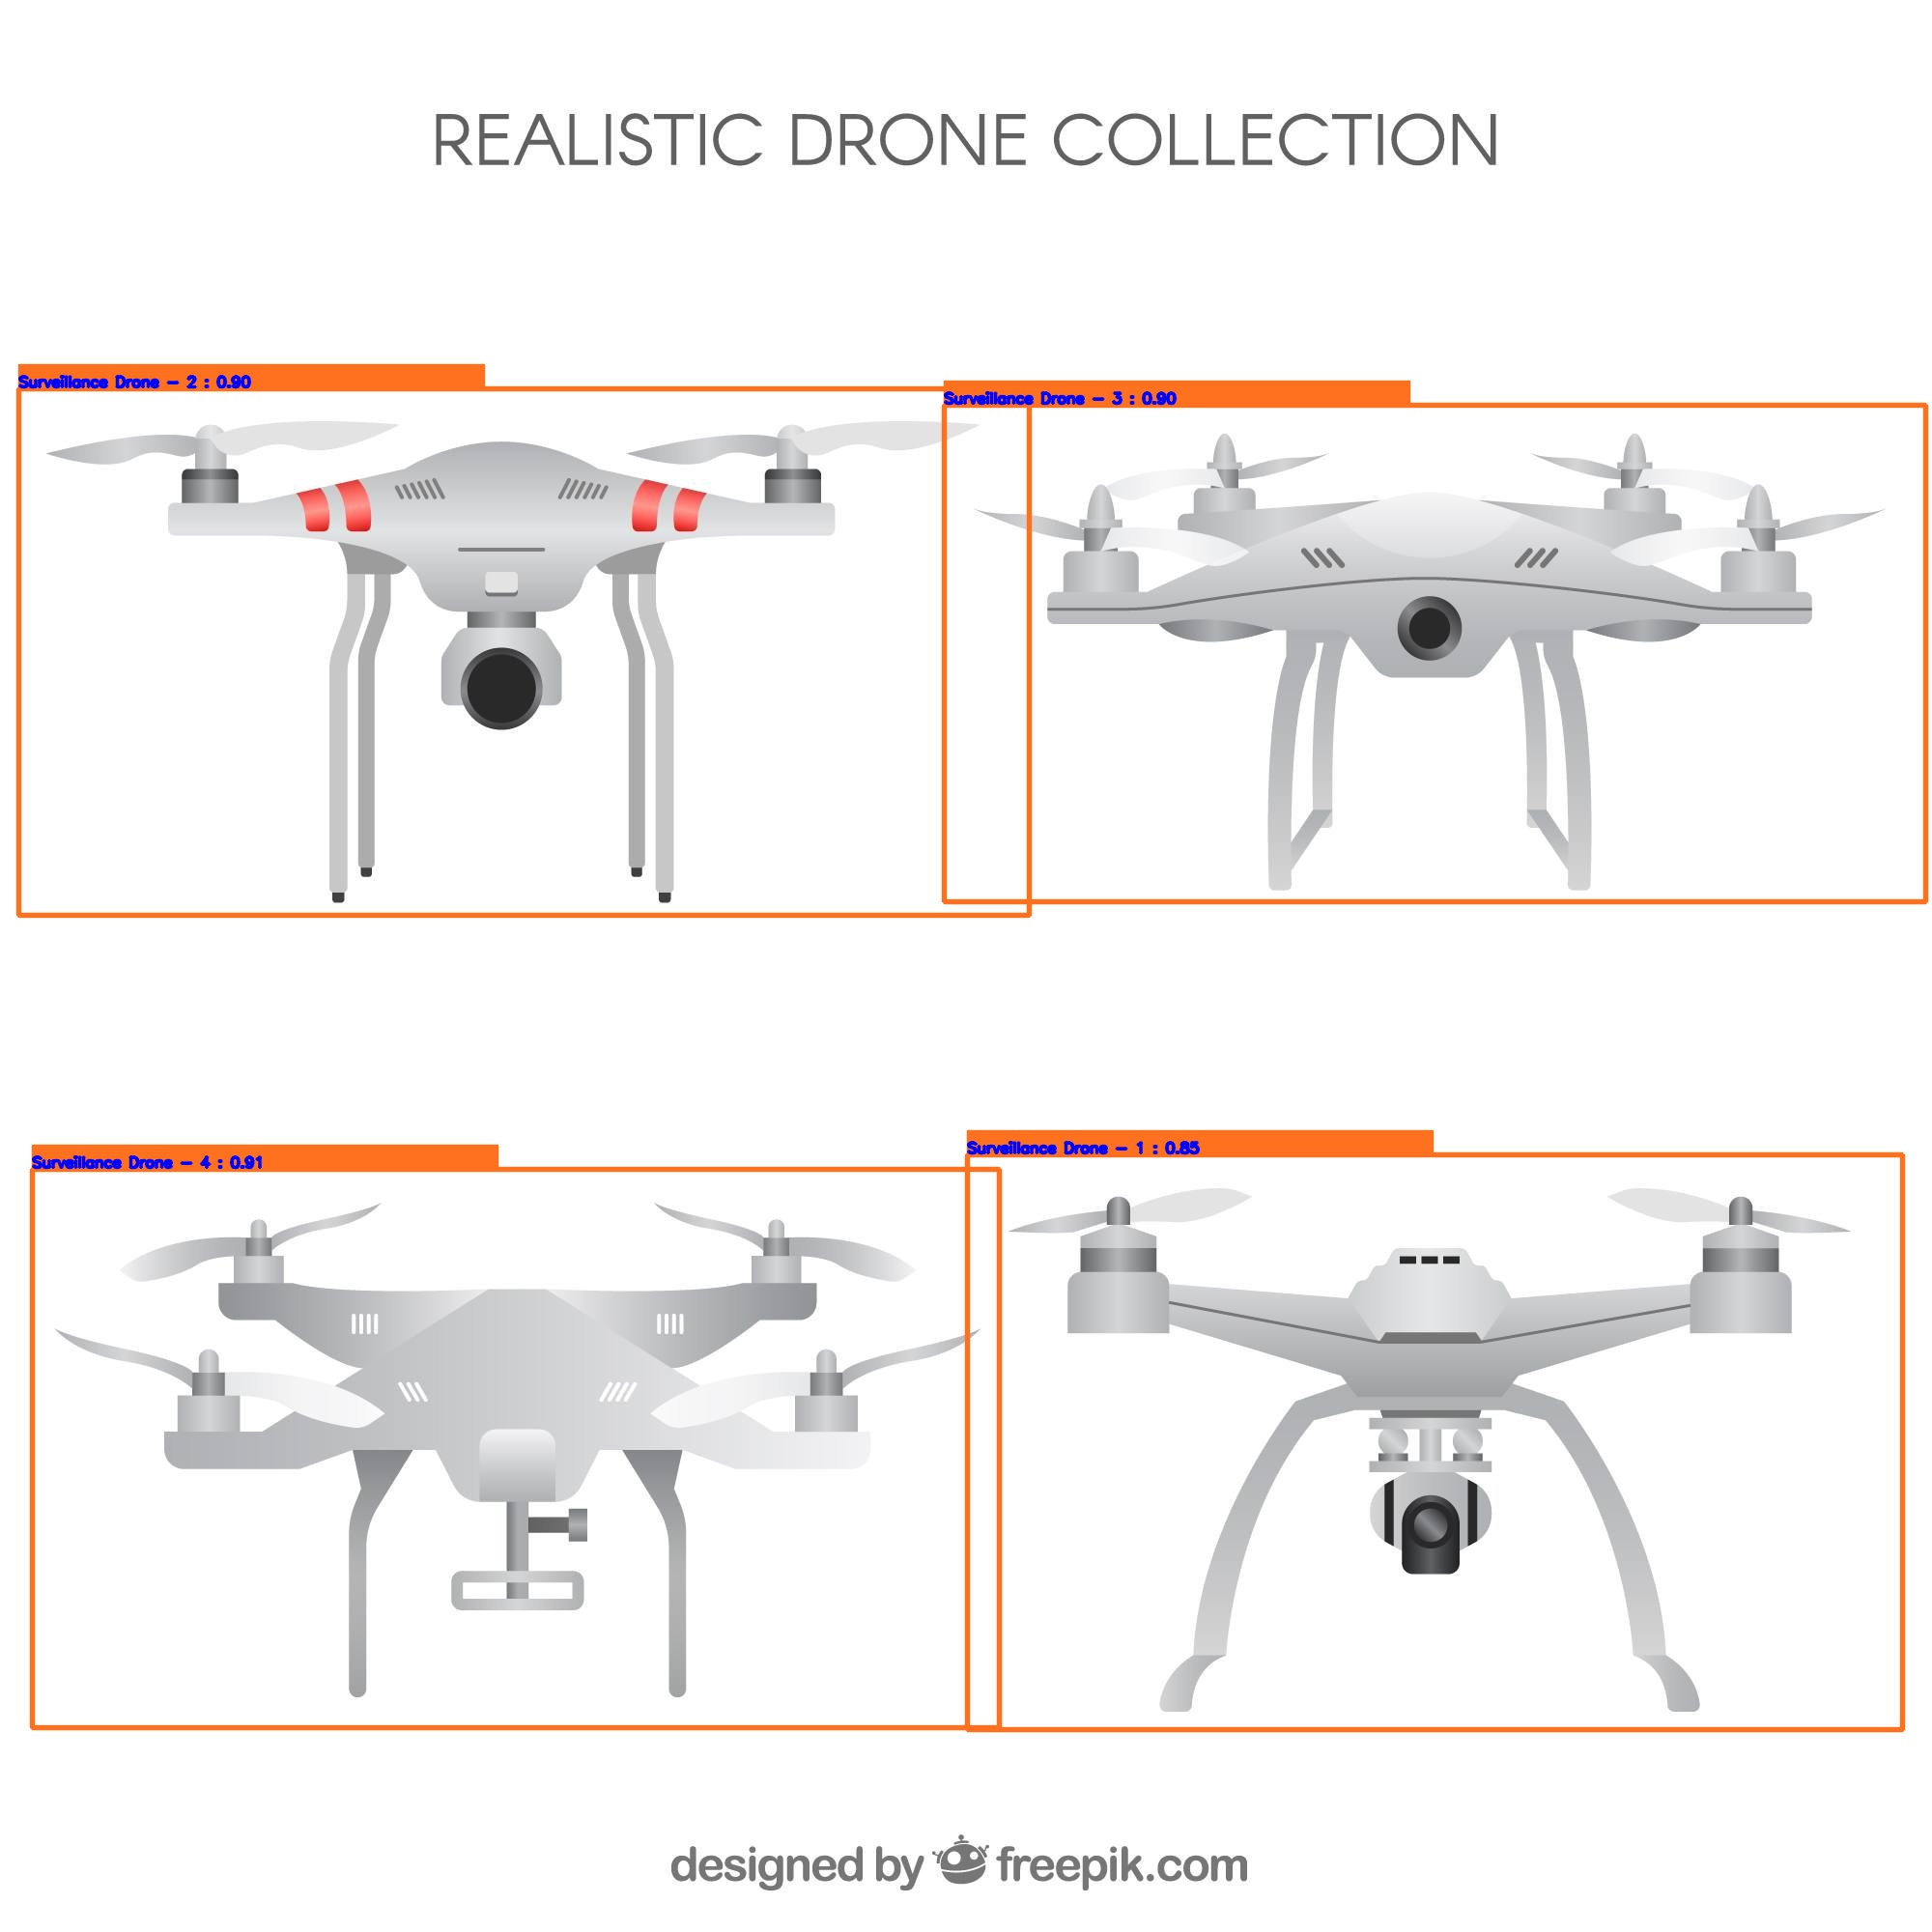

In [ ]:
img=cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp91/4drones.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
cv2.waitKey(10)
cv2.destroyAllWindows()

In [ ]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Test_Images/delivery2-test.mp4

detect: weights=['runs/train/exp2/weights/last.pt'], source=/content/drive/MyDrive/Test_Images/delivery2-test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-161-gf11a8a62 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

Number of objects detected :  0
video 1/1 (1/608) /content/drive/MyDrive/Test_Images/delivery2-test.mp4: 384x640 (no detections), 298.2ms

Number of objects detected :  0
video 1/1 (2/608) /content/drive/MyDrive/Test_Images/delivery2-test.mp4: 384x640 (no detections), 258.6ms

Number of objects detected :  0
video 1/1 (3/608) /cont

In [ ]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Test_Images/delivery2-test.mp4

Streaming output truncated to the last 5000 lines.
Coordinates of bounding box  3 [0.507031261920929, 0.894444465637207, 0.08281250298023224, 0.15555556118488312]   tensor(0.86360, device='cuda:0')
Coordinates of bounding box  4 [0.69140625, 0.3638888895511627, 0.21406249701976776, 0.4611110985279083]   tensor(0.86927, device='cuda:0')
Coordinates of bounding box  5 [0.3609375059604645, 0.8333333134651184, 0.09375, 0.17777778208255768]   tensor(0.87742, device='cuda:0')
Coordinates of bounding box  6 [0.4453125, 0.5972222089767456, 0.11562500149011612, 0.23333333432674408]   tensor(0.87925, device='cuda:0')
Coordinates of bounding box  7 [0.6578124761581421, 0.7416666746139526, 0.11562500149011612, 0.20555555820465088]   tensor(0.88585, device='cuda:0')
Coordinates of bounding box  8 [0.27421873807907104, 0.5680555701255798, 0.15468749403953552, 0.2805555462837219]   tensor(0.90141, device='cuda:0')
Coordinates of bounding box  9 [0.08124999701976776, 0.3361110985279083, 0.159374997019

In [ ]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Test_Images/surve2test.mp4

detect: weights=['runs/train/exp14/weights/last.pt'], source=/content/drive/MyDrive/Test_Images/surve2test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-161-gf11a8a6 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Coordinates of bounding box  1 [0.530468761920929, 0.6000000238418579, 0.785937488079071, 0.5222222208976746]   tensor(0.70609)

Number of objects detected :  1
video 1/1 (1/312) /content/drive/MyDrive/Test_Images/surve2test.mp4: 384x640 1 Surveillance Drone, 254.2ms
Coordinates of bounding box  1 [0.5335937738418579, 0.6000000238418579

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python detect.py --source 0

detect: weights=yolov5s.pt, source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "PyTorch>=1.7.0" not found, attempting AutoUpdate...
ERROR: Could not find a version that satisfies the requirement PyTorch>=1.7.0 (from versions: 0.1.2, 1.0.2)
ERROR: No matching distribution found for PyTorch>=1.7.0
requirements: ❌ Command 'pip install "PyTorch>=1.7.0"  ' returned non-zero exit status 1.
YOLOv5 🚀 v6.2-161-gf11a8a62 Python-3.8.16 torch-1.7.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show(